<a href="https://colab.research.google.com/github/harry418/Hackathons-participated/blob/main/Butterfly%20challange%20solution/butterfly_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/Dockship/butterfly_classification_ai_challenge-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
data_train = '/tmp/DATA/TRAIN'
data_test = '/tmp/DATA/TEST'

In [ ]:
  !pip install fastai --upgrade

     |████████████████████████████████| 194kB 5.5MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *
from fastai.vision import *
#from fastai.vision.core import *
from fastai.vision.data import *

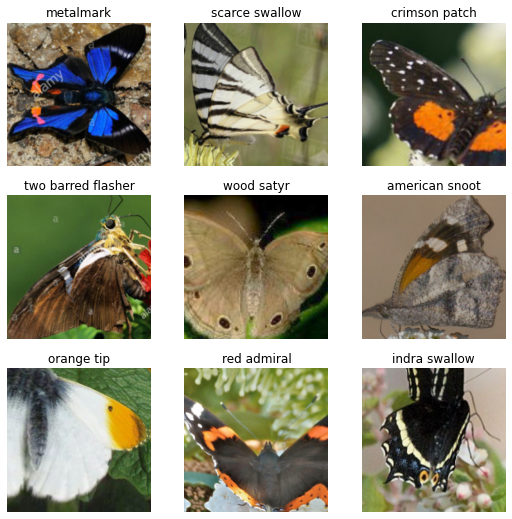

In [ ]:
def label_func(fname):
    #label = str(fname).split(os.path.sep)[-2]
    return str(fname).split(os.path.sep)[-2]
    #return label
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_train)
dls.show_batch()

In [ ]:
learner = cnn_learner(dls,models.densenet,metrics=accuracy)
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-7,1e-5))

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.027406,0.506493,0.848045,01:00


epoch,train_loss,valid_loss,accuracy,time
0,0.480254,0.378253,0.902793,01:13
1,0.337433,0.394663,0.905028,01:15


SuggestedLRs(lr_min=1.584893179824576e-05, lr_steep=7.585775847473997e-07)

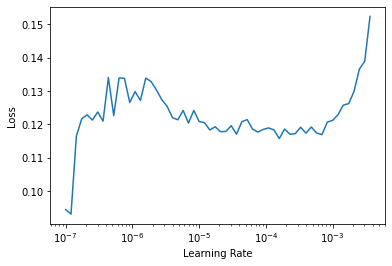

In [ ]:
learner.lr_find()

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(5,lr_max=slice(1e-5,1e-7))

epoch,train_loss,valid_loss,accuracy,time
0,0.133734,0.241247,0.944134,01:36
1,0.117605,0.234092,0.946369,01:36
2,0.109423,0.236796,0.945251,01:36
3,0.104510,0.234481,0.944134,01:36
4,0.107598,0.234529,0.943017,01:36


In [ ]:
learner.unfreeze()
learner.fit_one_cycle(10,lr_max=slice(2.3e-05,1e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.013587,0.342545,0.948603,01:37
1,0.013427,0.334517,0.948603,01:36
2,0.010403,0.338127,0.946369,01:36
3,0.013809,0.334496,0.945251,01:36
4,0.013590,0.330359,0.948603,01:36
5,0.011438,0.342688,0.950838,01:37
6,0.011897,0.341228,0.949721,01:36
7,0.012883,0.338215,0.947486,01:36
8,0.013603,0.339467,0.946369,01:35
9,0.012687,0.340782,0.947486,01:35


In [ ]:
learner.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.068844,0.431045,0.934078,01:15


epoch,train_loss,valid_loss,accuracy,time
0,0.068642,0.390439,0.940782,01:36
1,0.097446,0.397889,0.931844,01:37
2,0.088224,0.412869,0.935196,01:37
3,0.061455,0.345444,0.940782,01:36
4,0.044770,0.340732,0.938547,01:36


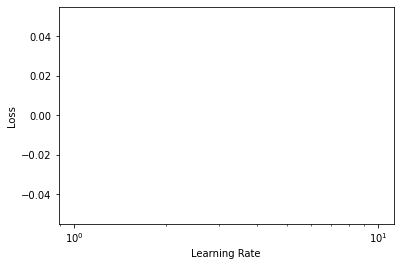

In [ ]:
learner.lr_find()

In [ ]:
from imutils import paths
import numpy as np
print("[INFO] loading images...")
imagePaths = list(paths.list_images(data_test))
imagePaths = sorted(imagePaths)
print(imagePaths[:5])

[INFO] loading images...
['/tmp/DATA/TEST/000.jpg', '/tmp/DATA/TEST/001.jpg', '/tmp/DATA/TEST/002.jpg', '/tmp/DATA/TEST/003.jpg', '/tmp/DATA/TEST/004.jpg']


In [ ]:
name = []
op = []
c= 0
for imagePath in imagePaths:
	img = load_image(imagePath)
	name.append(imagePath.split(os.path.sep)[-1])
	op.append(learner.predict(imagePath)[0])

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(name, op)), columns =['filename', 'label']) 
df.head()


,filename,label
0,000.jpg,red admiral
1,001.jpg,straited queen
2,002.jpg,metalmark
3,003.jpg,pipevine swallow
4,004.jpg,scarce swallow


In [ ]:
df.to_csv('/content/gdrive/My Drive/Dockship/out100.csv',index=False)